### **Use TensorFlow to implement linear regression algorithm on Iris Dataset**

This function shows how to use TensorFlow to solve linear regression.
```
y = Ax + b
```

**We will use the iris data, specifically:**
 - y = Sepal Length
 - x = Petal Width


Step #25 A = [[1.7625945]] b = [[3.4484038]]
Loss = 0.30564964
Step #50 A = [[1.4025775]] b = [[3.981746]]
Loss = 0.37134713
Step #75 A = [[1.1441914]] b = [[4.3147297]]
Loss = 0.29358017
Step #100 A = [[1.0148216]] b = [[4.5212097]]
Loss = 0.30047712


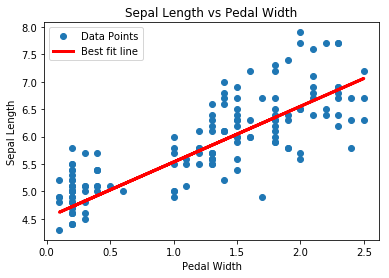

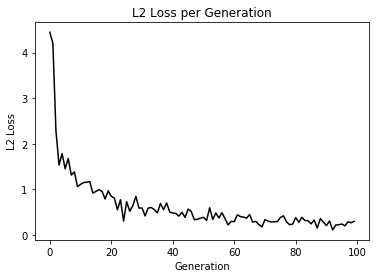

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Batch size
batch_size = 25

# Initialize placeholder
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Model variables
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Add linear model, y=Ax+b
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare the L2 loss function, which is the average of the batch loss.
loss = tf.reduce_mean(tf.square(y_target - model_output))

# Declare that the optimizer learning rate is set to 0.05
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Batch training traversal iteration
# Iterate 100 times, output variable value and loss value every 25 iterations
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

# Decimation factor
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Create the best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Draw two pictures
# Fitted line
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
# L2 regular loss function with 100 iterations
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

### **More Implementations**

In [ ]:
 - **Logistic Regression in Python with TensorFlow:**
        https://iq.opengenus.org/logistic-regression-tensorflow-python/ 
-  **Getting Started with TensorFlow 2**
          